In [1]:
setwd('/fs/cbcb-lab/rob/students/noor/Uncertainity/treeTerminusScripts')
load("environment/brain_sim_nodtu/mode=gc_bias/mapDf.RData")
load("environment/brain_sim_nodtu/mode=gc_bias/post_type=gibbs_nrep=100_tf=100/mean_cons/treeMC0.RData")
load("environment/brain_sim_nodtu/mode=gc_bias/post_type=gibbs_nrep=100_tf=100/mean_cons/treeCons.RData")
load("environment/brain_sim_nodtu/mode=gc_bias/post_type=gibbs_nrep=100_tf=100/mean_cons/yAggCons.RData")
# load("environment/brain_sim_nodtu/mode=gc_bias/post_type=gibbs_nrep=100_tf=100/mean_cons/yAggCor.RData")
# load("environment/brain_sim_nodtu/mode=gc_bias/post_type=gibbs_nrep=100_tf=100/mean_cons/yAggMeanInf.RData")
# load("environment/brain_sim_nodtu/mode=gc_bias/post_type=gibbs_nrep=100_tf=100/mean_cons/yAggMeanInf0.RData")
suppressPackageStartupMessages(source("tree_helper_function.R"))
suppressPackageStartupMessages(source("brain_simulation_nodtu/mode=gc_bias/post_type=gibbs_nrep=100_tf=100/tree_analysis/tree_filter.R"))

In [9]:
spreadCons <- rep(0, nrow(yAggCons))
desc <- Descendants(treeCons, length(treeCons$tip)+1:treeCons$Nnode)
spreadCons[length(treeCons$tip)+1:treeCons$Nnode] <- unlist(mclapply(desc, function(nodes) {
    mean(sd(assays(yAggCons)[["abundance"]][nodes,]), mc.cores=8)
}))

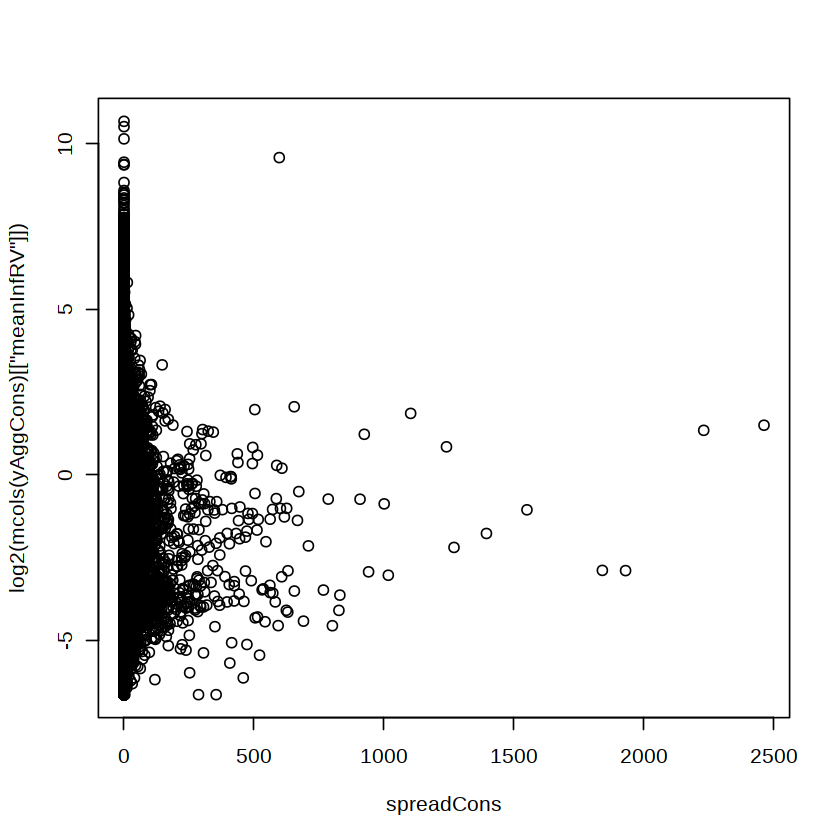

In [24]:
plot(unlist(spreadCons), log2(mcols(yAggCons)[["meanInfRV"]]))


In [37]:
spreadCons <- unlist(spreadCons)

In [40]:
d <- Descendants(treeCons,order(unlist(spreadCons), decreasing=T)[1:10])
sapply(d,length)

[1] 2 3 4 5 2 3 4 2 2 7

In [38]:
save(spreadCons, file="environment/brain_sim_nodtu/mode=gc_bias/post_type=gibbs_nrep=100_tf=100/mean_cons/spreadCons.RData")

In [ ]:
gc()
spreadCor <- rep(0, nrow(yAggCor))
desc <- Descendants(treeCor, length(treeCor$tip)+1:treeCor$Nnode)
spreadCor[length(treeCor$tip)+1:treeCor$Nnode] <- mclapply(desc, function(nodes) {
    mean(sd(assays(yAggCor)[["abundance"]][nodes,]), mc.cores=8)
})
save(spreadCor, file="environment/brain_sim_nodtu/mode=gc_bias/post_type=gibbs_nrep=100_tf=100/mean_cons/spreadCor.RData")

In [ ]:
gc()
spreadMeanInf <- rep(0, nrow(yAggMeanInf))
desc <- Descendants(treeMC, length(treeMC$tip)+1:treeMC$Nnode)
spreadMeanInf[length(treeMC$tip)+1:treeMC$Nnode] <- mclapply(desc, function(nodes) {
    mean(sd(assays(yAggMeanInf)[["abundance"]][nodes,]), mc.cores=8)
})
save(spreadMeanInf, file="environment/brain_sim_nodtu/mode=gc_bias/post_type=gibbs_nrep=100_tf=100/mean_cons/spreadMeanInf.RData")